In [594]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [595]:
for i in range(8):
    if i==0:
        train = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [596]:
train=train.reset_index(drop=True)
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,CLASS
0,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,YES
1,-0.000762,3178.86960,1.584,3.868130,8.697627,0.467034,0,5,0.478848,1,NO
2,-0.280848,2433.71730,2.986,8.065068,5.036993,1.305065,0,1,0.616979,0,UNKNOWN
3,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,YES
4,-0.140882,796.06140,1.530,4.089147,0.978448,0.231184,0,0,0.037146,0,YES
...,...,...,...,...,...,...,...,...,...,...,...
795,-0.019967,759.53076,2.055,4.006609,0.616965,0.424818,0,0,0.258356,0,UNKNOWN
796,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,YES
797,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,UNKNOWN
798,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,NO


In [597]:
temp1=train.copy()

In [598]:
#for indexi, strings in temp1.iterrows():    
#    if "YES" ==str(strings["CLASS"].strip()):
#       train.at[indexi,"incompatibilidad"]=0

In [599]:
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,CLASS
0,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,YES
1,-0.000762,3178.86960,1.584,3.868130,8.697627,0.467034,0,5,0.478848,1,NO
2,-0.280848,2433.71730,2.986,8.065068,5.036993,1.305065,0,1,0.616979,0,UNKNOWN
3,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,YES
4,-0.140882,796.06140,1.530,4.089147,0.978448,0.231184,0,0,0.037146,0,YES
...,...,...,...,...,...,...,...,...,...,...,...
795,-0.019967,759.53076,2.055,4.006609,0.616965,0.424818,0,0,0.258356,0,UNKNOWN
796,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,YES
797,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,UNKNOWN
798,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,NO


<Axes: title={'center': 'incompatibilidad'}, xlabel='CLASS'>

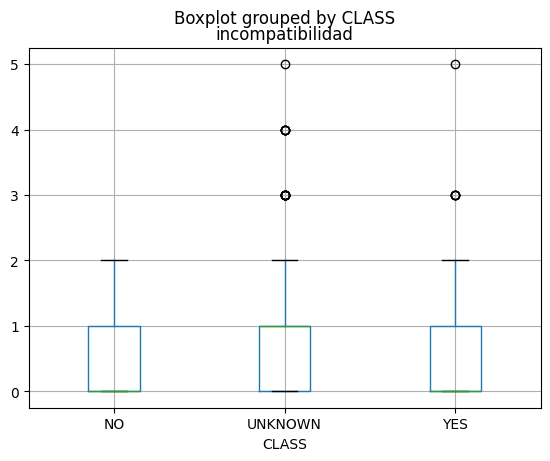

In [600]:
train.boxplot(by="CLASS",column=["incompatibilidad"])

In [601]:
#train=train.drop(["antonimos","sim_faltantes","distancias","suma"],axis=1)
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,CLASS
0,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,YES
1,-0.000762,3178.86960,1.584,3.868130,8.697627,0.467034,0,5,0.478848,1,NO
2,-0.280848,2433.71730,2.986,8.065068,5.036993,1.305065,0,1,0.616979,0,UNKNOWN
3,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,YES
4,-0.140882,796.06140,1.530,4.089147,0.978448,0.231184,0,0,0.037146,0,YES
...,...,...,...,...,...,...,...,...,...,...,...
795,-0.019967,759.53076,2.055,4.006609,0.616965,0.424818,0,0,0.258356,0,UNKNOWN
796,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,YES
797,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,UNKNOWN
798,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,NO


In [602]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [603]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [604]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

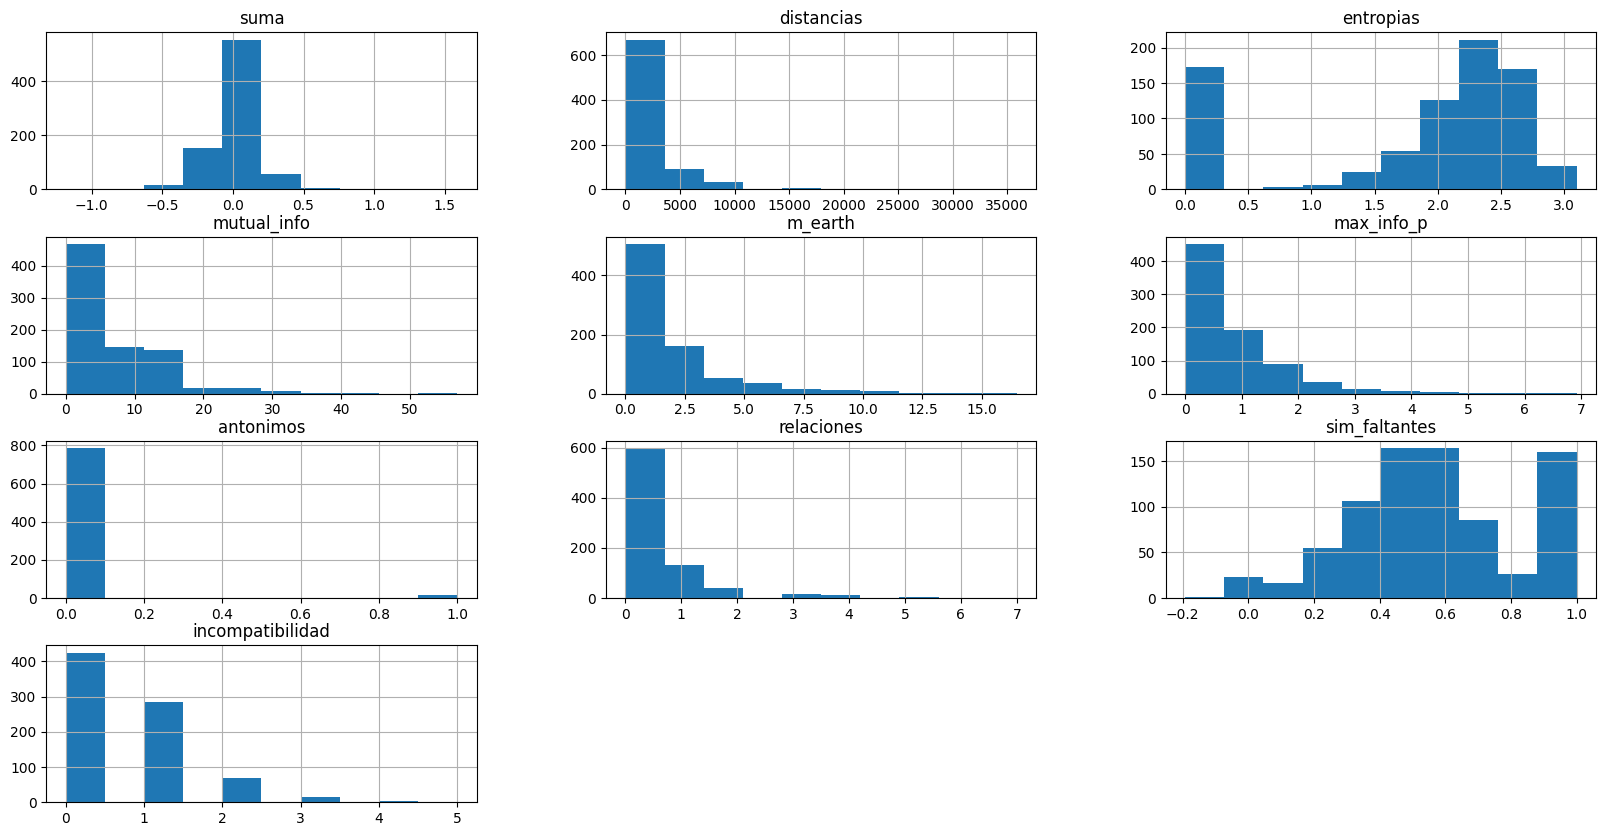

In [605]:
train.hist(figsize=(20,10))
plt.show()

In [606]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [607]:
test=test.reset_index(drop=True)

In [608]:
#test["relaciones"]=test["relaciones"]+test["antonimos"]

In [609]:
#test=test.drop(["antonimos","sim_faltantes","distancias","suma"],axis=1)
test

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,CLASS
0,-0.176353,4051.2014,2.093,8.069644e+00,7.061271,0.919573,0,0,0.457370,0,YES
1,-0.006087,1441.6440,2.149,4.042872e+00,0.701502,0.393066,0,0,0.338005,1,YES
2,0.000000,536.2693,0.000,7.513989e-13,4.289287,0.000000,0,0,0.000000,0,YES
3,0.000000,0.0000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,0,YES
4,-0.068107,863.1677,2.468,3.915644e+00,0.973838,0.412710,0,0,0.413161,0,NO
...,...,...,...,...,...,...,...,...,...,...,...
795,-0.107113,1861.5322,1.864,4.022538e+00,1.067078,0.276587,0,1,0.215729,1,YES
796,0.000000,0.0000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,0,NO
797,0.042652,1257.3066,2.208,3.976425e+00,0.589826,0.467463,0,0,0.485553,0,UNKNOWN
798,0.021256,632.9640,1.549,3.902124e+00,1.010164,0.353093,0,0,0.234342,1,UNKNOWN


In [610]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [611]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [612]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [613]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [614]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [615]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [616]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [617]:
model.decision_function(X)

array([ 9.15205822e-01,  7.05295923e-01, -8.82830100e-02,  9.15205822e-01,
       -6.92708879e-02,  3.22684607e-01,  9.15205822e-01,  9.15205822e-01,
       -1.36386473e-01, -9.90338612e-01, -2.89089007e-02,  9.15205822e-01,
        1.59419979e-01,  6.45828610e-01,  1.29391450e+00,  9.15205822e-01,
       -3.51630825e-01,  2.66769943e-01,  6.47472024e-01,  2.49352354e-01,
        5.27777786e-01,  1.28614224e-01,  4.07950629e-01,  5.85922931e-01,
        3.04078487e-02,  1.02279246e-01,  1.52893669e-01,  1.29265721e-01,
        4.15963068e-01,  5.37533346e-01,  6.35162059e-01,  3.50883205e-01,
        1.41669906e-01,  1.94850495e-01,  2.08295299e-01,  3.98465797e-01,
        4.71920140e-01,  3.50629129e-01,  5.17501605e-01,  9.15205822e-01,
        5.50423840e-01,  1.83781052e-01, -3.92952139e-01,  6.26569741e-01,
        3.86418000e-01,  3.65585264e-01,  4.96335195e-01,  1.96013511e-01,
        5.03066547e-01,  2.80242619e-01, -1.64949580e-01,  6.08811784e-01,
       -1.07671770e+00,  

In [618]:
labels=train.columns[:-1]
labels

Index(['suma', 'distancias', 'entropias', 'mutual_info', 'm_earth',
       'max_info_p', 'antonimos', 'relaciones', 'sim_faltantes',
       'incompatibilidad'],
      dtype='object')

In [619]:
model.classes_

array([0, 1])

In [620]:
model.coef_[0]

array([ 0.06907849, -0.14347739, -0.04211378, -1.50817524,  0.25604588,
        0.46135433, -0.00787876, -0.09988069,  0.05664948,  0.25422635])

In [621]:
coeficientes=model.coef_[0]

In [622]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  5 max_info_p 3 mutual_info


In [623]:
n_columns=train.shape[1]-1

In [624]:
n_columns

10

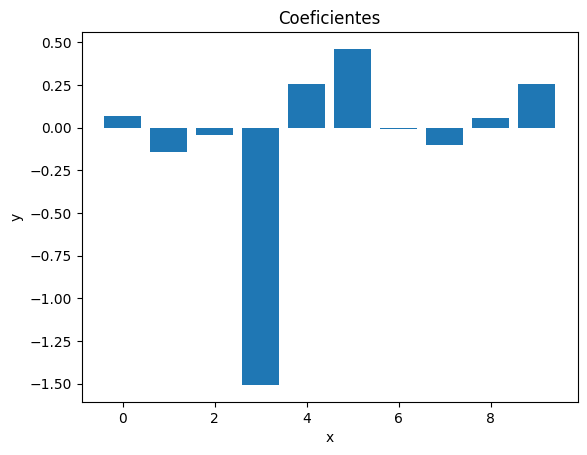

In [625]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [626]:
predictions = model.predict(X_test)

In [627]:
print(confusion_matrix(y_test, predictions))

[[196 194]
 [137 273]]


In [628]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.59
precision:  0.58
recall 0.67
f1_score:  0.62
matthews_score:  0.17


In [629]:
X_train.shape

(800, 10)

In [630]:
X_test.shape

(800, 10)

In [631]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [632]:
validation_size = 0.20
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [633]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.610000 (0.064015)


In [634]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.760000 (0.069470)


In [635]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.670000 (0.047263)


In [636]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.250000 (0.080719)


In [637]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [638]:
#linear_model

In [639]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [640]:
y_predict = model.predict(X_test)
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.50      0.59      0.54       333
           1       0.67      0.58      0.62       467

    accuracy                           0.59       800
   macro avg       0.58      0.59      0.58       800
weighted avg       0.60      0.59      0.59       800



In [641]:
explainer = shap.LinearExplainer(model,X_train,feature_names=test.columns[:-1],feature_perturbation="interventional")
shap_values = explainer(X_test)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [642]:
explainer.expected_value

-0.09275458711934655

In [643]:
explainer.coef

array([ 0.06907849, -0.14347739, -0.04211378, -1.50817524,  0.25604588,
        0.46135433, -0.00787876, -0.09988069,  0.05664948,  0.25422635])

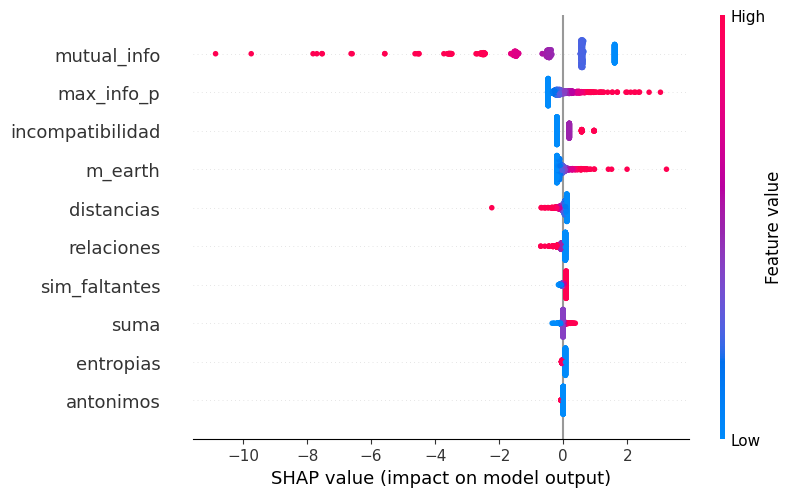

In [644]:
shap.plots.beeswarm(shap_values)

In [645]:
shap_values

.values =
array([[-0.07922113, -0.16301176, -0.01652479, ...,  0.06590564,
        -0.0163251 , -0.19814278],
       [-0.00753564,  0.01457338, -0.01881699, ...,  0.06590564,
        -0.03980421,  0.18886382],
       [-0.00497276,  0.07618579,  0.06914596, ...,  0.06590564,
        -0.1062902 , -0.19814278],
       ...,
       [ 0.01298472,  0.02711788, -0.02123198, ...,  0.06590564,
        -0.01078142, -0.19814278],
       [ 0.00397651,  0.06960553,  0.00574224, ...,  0.06590564,
        -0.06019483,  0.18886382],
       [-0.00497276,  0.11267989,  0.06914596, ...,  0.06590564,
         0.09041081, -0.19814278]])

.base_values =
array([-0.09275459, -0.09275459, -0.09275459, -0.09275459, -0.09275459,
       -0.09275459, -0.09275459, -0.09275459, -0.09275459, -0.09275459,
       -0.09275459, -0.09275459, -0.09275459, -0.09275459, -0.09275459,
       -0.09275459, -0.09275459, -0.09275459, -0.09275459, -0.09275459,
       -0.09275459, -0.09275459, -0.09275459, -0.09275459, -0.09275459,
 

In [646]:
#shap.plots.beeswarm(shap_values[:,0])

In [647]:
y_test[:6]

[1, 1, 1, 1, 0, 1]

In [648]:
ind = 1
shap.plots.force(shap_values[ind])

In [649]:
ind = 4
shap.plots.force(shap_values[ind])

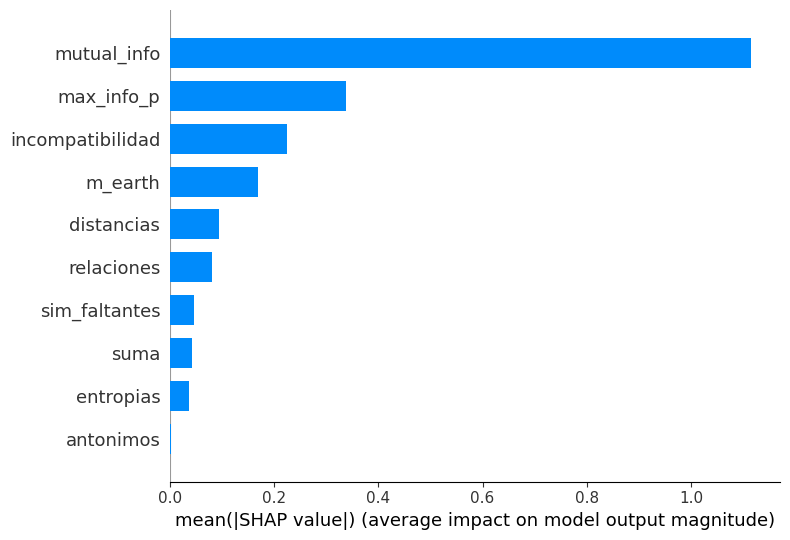

In [650]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

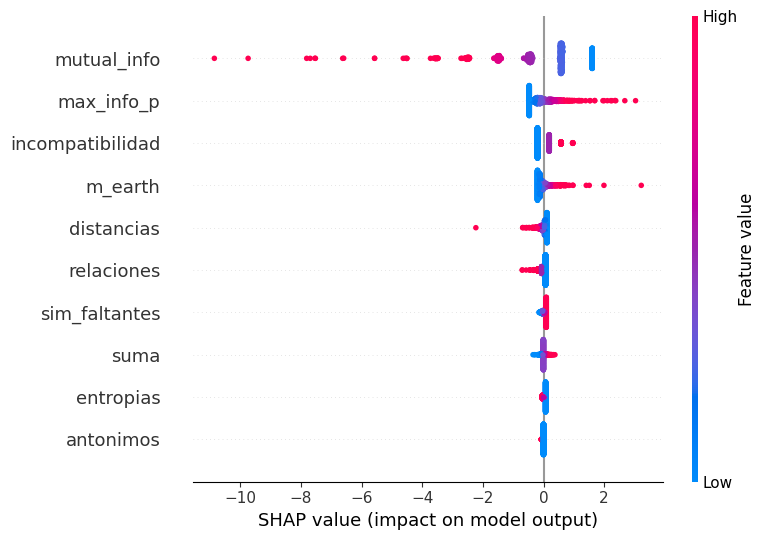

In [651]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

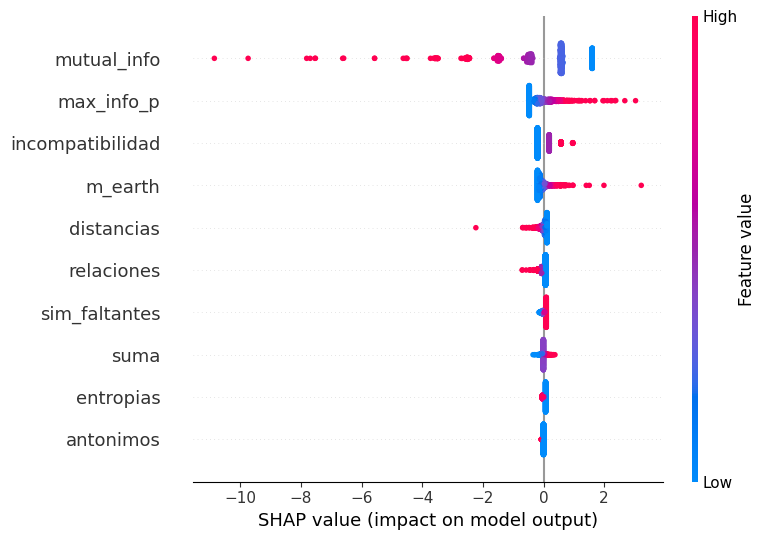

In [652]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

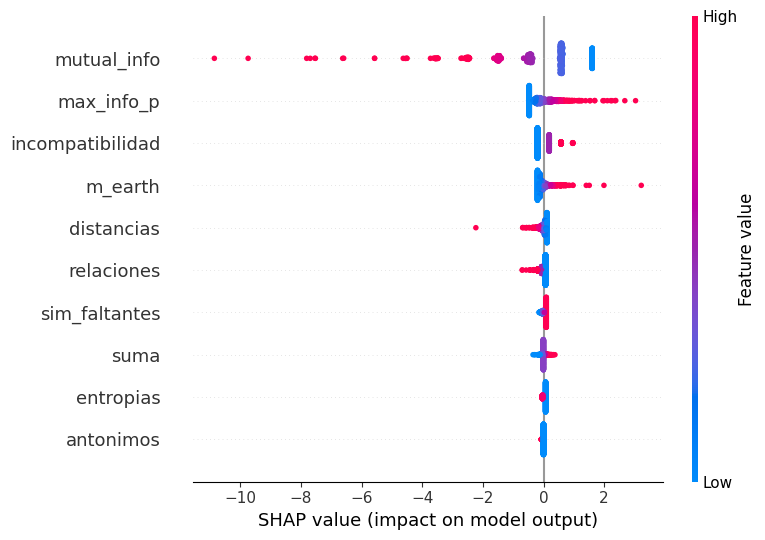

In [653]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [654]:
explainer.expected_value

-0.09275458711934655

In [655]:
shap_values.shape

(800, 10)